# Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

# Importing the Dataset

In [2]:
raw_df = pd.read_csv('../raw_data/data_first_cleaning.csv')
raw_df

,address,garage-places,price,rooms,square-meters,neighborhood,city,latitude,longitude
0,"Avenida Raja Gabaglia, 1583",1,330000,1,40,Luxemburgo,Belo Horizonte,-19.936415,-43.953396
1,"Rua dos Expedicionários, 1082",5,1190000,4,411,Santa Amélia,Belo Horizonte,-20.225241,-44.397780
2,"Rua Marechal Hermes, 81",4,1590000,4,158,Gutierrez,Belo Horizonte,-19.937155,-43.958694
3,"Rua Juruna, 110",6,550000,3,278,Pindorama,Belo Horizonte,-19.912982,-44.019944
4,"Rua Maria Pereira de Araújo, 15",1,450000,3,87,Castelo,Belo Horizonte,-19.886147,-44.004236
...,...,...,...,...,...,...,...,...,...
5758,Rua Gama Cerqueira,2,560000,3,92,Nova Suíssa,Belo Horizonte,-19.945428,-43.970988
5759,"Rua Arthur Lourenço, 262",1,440000,3,90,Barreiro,Belo Horizonte,-19.979915,-44.026007
5760,Rua General Ephigênio Ruas Santos,2,500000,3,80,Itapoã,Belo Horizonte,-19.840904,-43.956037
5761,Rua General Ephigênio Ruas Santos,2,740000,3,80,Itapoã,Belo Horizonte,-19.840904,-43.956037


Creating a copy of the main Dataset, so we don't mess the original.

In [3]:
df = raw_df.copy()

Checking the main structure of the data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5763 entries, 0 to 5762
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        5763 non-null   object 
 1   garage-places  5763 non-null   int64  
 2   price          5763 non-null   int64  
 3   rooms          5763 non-null   int64  
 4   square-meters  5763 non-null   int64  
 5   neighborhood   5763 non-null   object 
 6   city           5763 non-null   object 
 7   latitude       5763 non-null   float64
 8   longitude      5763 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 405.3+ KB


# Evaluating the correlation between features

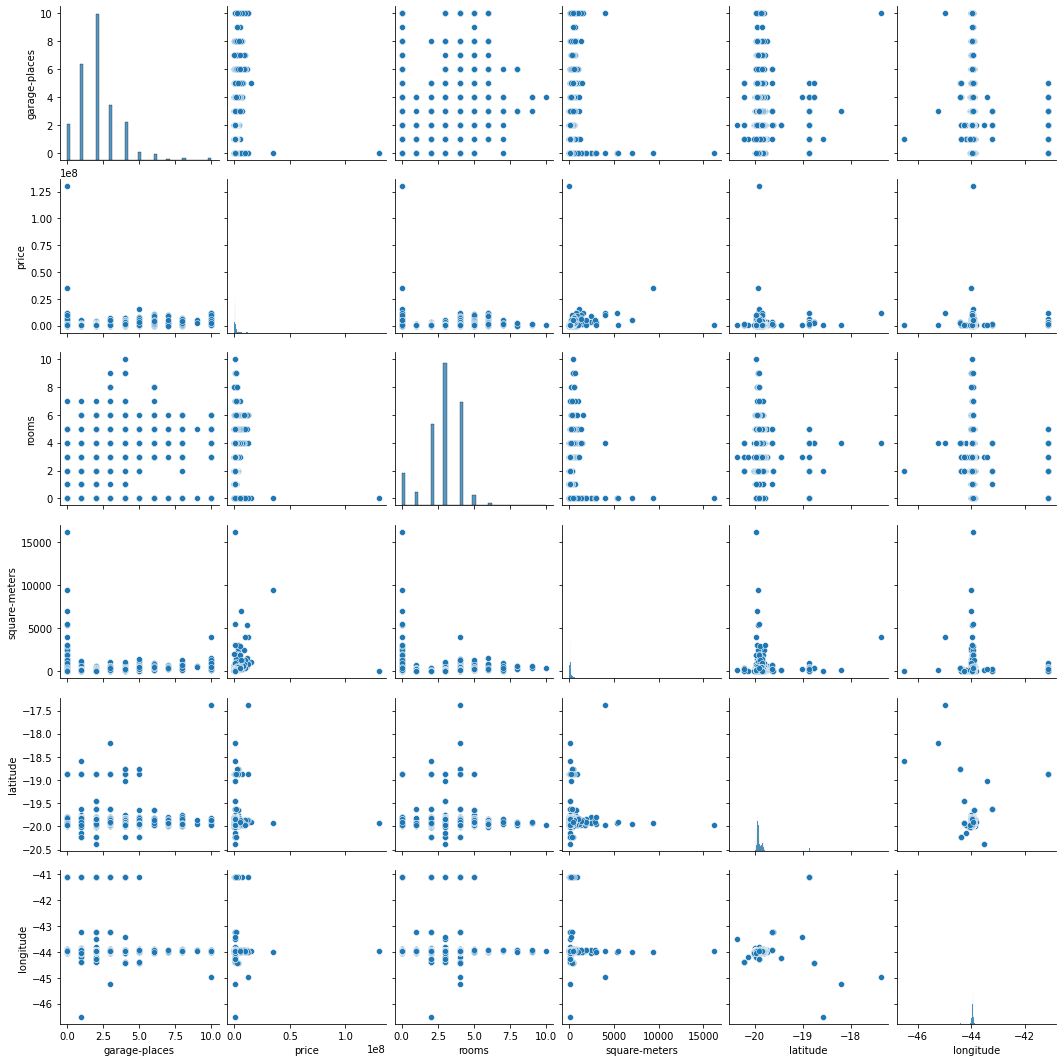

In [5]:
sns.pairplot(df);

Since our target is the **PRICE**, let's see how each feature influences it.

This step is also helpful to identify (and maybe, delete) some **outliers** in the dataset.

## Price x SQM

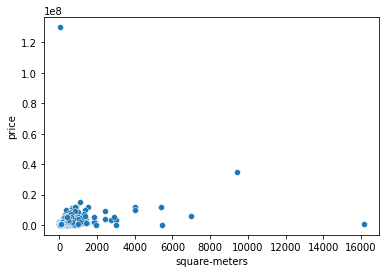

In [6]:
sns.scatterplot(x=df['square-meters'], y=df['price']);

In [7]:
sorted(df['price'], reverse=True)

[130000000,
 35000000,
 15000000,
 12000000,
 11990000,
 11900000,
 11900000,
 11800000,
 11500000,
 11000000,
 10000000,
 10000000,
 9500000,
 9500000,
 9295000,
 9295000,
 8950000,
 8856000,
 8700000,
 8578000,
 8500000,
 8500000,
 8200000,
 8000000,
 8000000,
 8000000,
 8000000,
 7500000,
 7250000,
 7200000,
 7000000,
 7000000,
 6900000,
 6900000,
 6900000,
 6700000,
 6700000,
 6700000,
 6600000,
 6600000,
 6500000,
 6500000,
 6500000,
 6500000,
 6500000,
 6405157,
 6405157,
 6405156,
 6300000,
 6200000,
 6000000,
 6000000,
 6000000,
 6000000,
 5980000,
 5980000,
 5950000,
 5950000,
 5950000,
 5900000,
 5900000,
 5900000,
 5900000,
 5900000,
 5900000,
 5900000,
 5900000,
 5800000,
 5600000,
 5600000,
 5500000,
 5500000,
 5500000,
 5500000,
 5500000,
 5500000,
 5500000,
 5500000,
 5500000,
 5500000,
 5500000,
 5490000,
 5400000,
 5320000,
 5263200,
 5224500,
 5100000,
 5045940,
 5013020,
 5000000,
 5000000,
 5000000,
 5000000,
 5000000,
 5000000,
 5000000,
 4990000,
 4950000,
 495000

In [8]:
df = df[df['price'] < 35000000] #130000000 and 35000000 were to price outliers

In [9]:
df = df[df['square-meters'] > 0] #Some values with 0 square meters were still here

In [10]:
sorted(df['square-meters'], reverse=True)

[16153,
 7000,
 5447,
 5388,
 4000,
 4000,
 3000,
 3000,
 2884,
 2736,
 2400,
 2399,
 1940,
 1892,
 1833,
 1830,
 1830,
 1500,
 1460,
 1430,
 1400,
 1370,
 1352,
 1333,
 1332,
 1300,
 1285,
 1250,
 1240,
 1216,
 1215,
 1200,
 1200,
 1200,
 1114,
 1110,
 1100,
 1100,
 1075,
 1050,
 1017,
 1007,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 973,
 960,
 913,
 900,
 895,
 889,
 853,
 850,
 840,
 825,
 820,
 820,
 804,
 800,
 800,
 800,
 784,
 779,
 764,
 763,
 760,
 750,
 739,
 730,
 730,
 727,
 724,
 720,
 720,
 720,
 707,
 706,
 700,
 700,
 700,
 700,
 700,
 700,
 700,
 690,
 690,
 680,
 668,
 660,
 659,
 655,
 653,
 652,
 650,
 650,
 650,
 650,
 650,
 639,
 638,
 637,
 637,
 635,
 632,
 630,
 628,
 627,
 625,
 620,
 620,
 620,
 620,
 620,
 620,
 608,
 605,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 595,
 595,
 589,
 584,
 584,
 580,
 580,
 575,
 574,
 574,
 574,
 574,
 572,
 570,
 570,
 565,
 5

In [11]:
df = df[df['square-meters'] < 16153] #16153 is the major square-meter outlier 

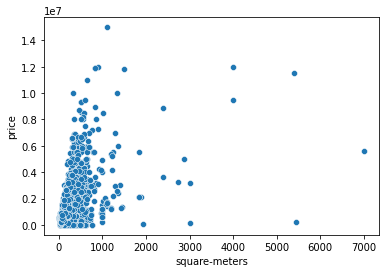

In [12]:
sns.scatterplot(x=df['square-meters'], y=df['price']);

After removing the outliers, we can see that we still have some records that might influence the direction of your correlation line. Since we are dealing with houses and apartments, and knowing that we might find houses with more than 1500 sqm, let's exclude those records to have a more consistent database.

In [13]:
df = df[df['square-meters'] < 1500]

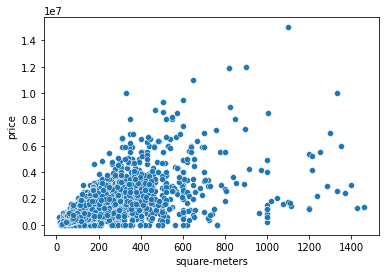

In [14]:
sns.scatterplot(x=df['square-meters'], y=df['price']);

Now we can see more clearly the correlation between **Price** and **Square-Meters**, and it is **very relevant**!

## Price x Rooms

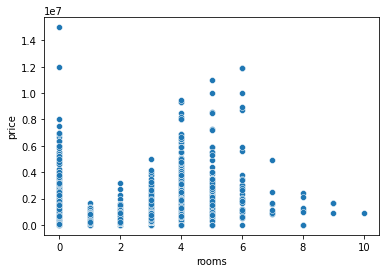

In [15]:
sns.scatterplot(x=df['rooms'], y=df['price']);

**MAIN INSIGHTS**:
- There's a lot of **'zero rooms'** houses. Probably, those records refer to stores or commercial points.
- Naturally more rooms = higher price. However, if a house have more than 5 rooms, we might assume we are dealing with a big house, in which other features might have a bigger impact on the price level (total estate area and location, for example).

## Price x Garage

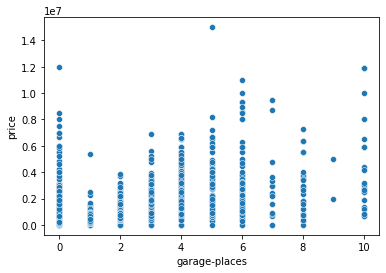

In [16]:
sns.scatterplot(x=df['garage-places'], y=df['price']);

**MAIN INSIGHTS**:
- There's a lot of **'zero garage'** houses. However, this doesn't seems to be a problem, since we do often find houses that do not have any garage spaces (maybe they're too old, or maybe even too new).
- Naturally more garages = higher price. However, just like we dealt with the rooms, if a house have more than 6 garage spaces, we might assume we are dealing with a big house, in which other features might have a bigger impact on the price level (total estate area and location, for example).

## General Correlation

In [17]:
df.corr()

,garage-places,price,rooms,square-meters,latitude,longitude
garage-places,1.000000,0.564851,0.507149,0.454173,-0.014822,-0.000020
price,0.564851,1.000000,0.289625,0.626187,-0.000573,0.087954
rooms,0.507149,0.289625,1.000000,0.240331,-0.008496,0.010409
square-meters,0.454173,0.626187,0.240331,1.000000,0.027132,0.026355
latitude,-0.014822,-0.000573,-0.008496,0.027132,1.000000,0.742904
longitude,-0.000020,0.087954,0.010409,0.026355,0.742904,1.000000


We can clearly see that **PRICE** is directly correlated with **SQUARE METERS**, **GARAGE PLACES** and **ROOMS**.

To continue with a simple approach, let's drop every feature regarding neighborhoods and location in general. We might use those features on deeper analysis.

In [18]:
df.drop(columns=['address', 'neighborhood', 'city', 'latitude', 'longitude'], inplace=True)
df.rename(columns = {'garage-places':'garage', 'square-meters':'sqm'}, inplace = True)
df

,garage,price,rooms,sqm
0,1,330000,1,40
1,5,1190000,4,411
2,4,1590000,4,158
3,6,550000,3,278
4,1,450000,3,87
...,...,...,...,...
5758,2,560000,3,92
5759,1,440000,3,90
5760,2,500000,3,80
5761,2,740000,3,80


In [19]:
#Saving the cleaned dataset as a new CSV at the 'raw_data' folder
#index=False, so it won't create a new index in addition to the existing one
df.to_csv('../raw_data/data_for_first_model.csv', index=False)

# StatsModels Analysis

## Price x SQM

In [20]:
model = smf.ols(formula = 'price ~ sqm', data=df).fit()

In [21]:
model.params
#For each new squaremeter, the price raises (on average) $4,689 BRL.

Intercept    272730.939968
sqm            4689.152855
dtype: float64

In [22]:
model.summary()
#The R-squared tells us the positive relation between the features
#The low P-Value ensures the statistically significance related to the null hypothesis

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     3697.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:32:31   Log-Likelihood:                -86444.
No. Observations:                5734   AIC:                         1.729e+05
Df Residuals:                    5732   BIC:                         1.729e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.727e+05   1.65e+04     16.510      0.000     2.4e+05    3.05e+05
sqm         4689.1529     77.117     60.806      0.000    4537.975    4840.331
==============================================================================
Omnibus:                     3065.966   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90539.315
Skew:                           1.988   Prob(JB):                         0.00
Kurtosis:                      22.056   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
predicted_prices = model.predict(df['sqm'])
residuals = predicted_prices - df['price']

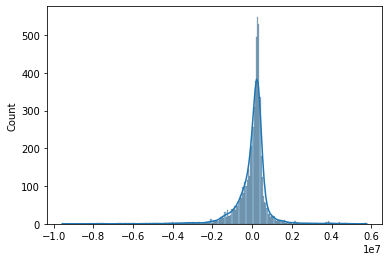

In [24]:
sns.histplot(residuals, kde=True);
#The model isn't perfect yet. The curve is slightly skewed towards +0.2

## Price x Rooms

In [25]:
model = smf.ols(formula = 'price ~ rooms', data=df).fit()

In [26]:
model.params
#For each new room, the price raises (on average) $254K BRL.

Intercept    285900.754208
rooms        254196.431027
dtype: float64

In [27]:
model.summary()
#The R-squared tells us the positive relation between the features (but lighter than the SQM relation)
#The low P-Value ensures the statistically significance related to the null hypothesis

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     524.8
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          3.25e-111
Time:                        15:32:33   Log-Likelihood:                -87620.
No. Observations:                5734   AIC:                         1.752e+05
Df Residuals:                    5732   BIC:                         1.753e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.859e+05   3.44e+04      8.314      0.000    2.18e+05    3.53e+05
rooms       2.542e+05   1.11e+04     22.909      0.000    2.32e+05    2.76e+05
==============================================================================
Omnibus:                     4933.277   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           177424.473
Skew:                           4.011   Prob(JB):                         0.00
Kurtosis:                      29.044   Cond. No.                         8.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
predicted_prices = model.predict(df['rooms'])
residuals = predicted_prices - df['price']

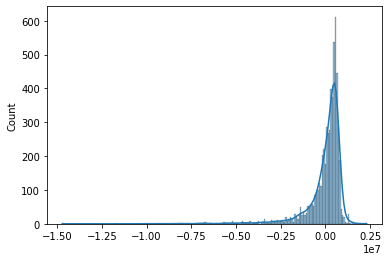

In [29]:
sns.histplot(residuals, kde=True);
#The model isn't perfect yet. The curve is slightly skewed towards +0.25

## Price x Garages

In [30]:
model = smf.ols(formula = 'price ~ garage', data=df).fit()

In [31]:
model.params
#For each new garage, the price raises (on average) $431K BRL.

Intercept     99623.467330
garage       431550.480953
dtype: float64

In [32]:
model.summary()
#The R-squared tells us the positive relation between the features (almost like the SQM relation)
#The low P-Value ensures the statistically significance related to the null hypothesis

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     2686.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:32:35   Log-Likelihood:                -86770.
No. Observations:                5734   AIC:                         1.735e+05
Df Residuals:                    5732   BIC:                         1.736e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.962e+04   2.12e+04      4.702      0.000    5.81e+04    1.41e+05
garage      4.316e+05   8327.228     51.824      0.000    4.15e+05    4.48e+05
==============================================================================
Omnibus:                     4828.642   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218858.613
Skew:                           3.776   Prob(JB):                         0.00
Kurtosis:                      32.309   Cond. No.                         5.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
predicted_prices = model.predict(df['garage'])
residuals = predicted_prices - df['price']

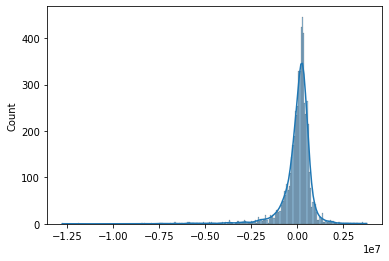

In [34]:
sns.histplot(residuals, kde=True);
#The model isn't perfect yet, but it is more balanced than the last ones

## Price x (SQM + Garage + Rooms)

In [35]:
model = smf.ols(formula = 'price ~ sqm + garage + rooms', data=df).fit()

In [36]:
model.params
#For each new squaremeter, the price raises (on average) $3,487 BRL.
#For each new garage, the price raises (on average) $270K BRL.
#The values are more balanced now
#But the rooms are weird here...

Intercept   -103381.786395
sqm            3487.629897
garage       270723.873415
rooms         -1766.846059
dtype: float64

In [37]:
model.summary()
#The R-squared tells us the positive relation between the features (the highest one so far)
#The low P-Value ensures the statistically significance related to the null hypothesis...
#...However the 'rooms' are not adding any significance

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     1844.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:32:38   Log-Likelihood:                -85934.
No. Observations:                5734   AIC:                         1.719e+05
Df Residuals:                    5730   BIC:                         1.719e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.034e+05   2.63e+04     -3.933      0.000   -1.55e+05   -5.19e+04
sqm         3487.6299     79.211     44.030      0.000    3332.347    3642.913
garage      2.707e+05   9101.999     29.743      0.000    2.53e+05    2.89e+05
rooms      -1766.8461   9596.824     -0.184      0.854   -2.06e+04     1.7e+04
==============================================================================
Omnibus:                     3503.468   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           126924.197
Skew:                           2.349   Prob(JB):                         0.00
Kurtosis:                      25.565   Cond. No.                         565.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
predicted_prices = model.predict(df[['sqm', 'garage', 'rooms']])
residuals = predicted_prices - df['price']

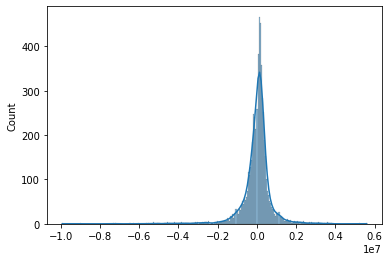

In [39]:
sns.histplot(residuals, kde=True);
#Seems balanced!
#But let's try WITHOUT the 'rooms'...

## Price x (SQM + Garage)

In [40]:
model = smf.ols(formula = 'price ~ sqm + garage', data=df).fit()

In [41]:
model.params
#Same values as before

Intercept   -106743.326818
sqm            3487.440005
garage       269952.666291
dtype: float64

In [42]:
model.summary()
#The R-squared didn't change
#The P-Value still low

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     2766.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:32:40   Log-Likelihood:                -85934.
No. Observations:                5734   AIC:                         1.719e+05
Df Residuals:                    5731   BIC:                         1.719e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.067e+05   1.89e+04     -5.646      0.000   -1.44e+05   -6.97e+04
sqm         3487.4400     79.197     44.035      0.000    3332.183    3642.697
garage        2.7e+05   8080.130     33.409      0.000    2.54e+05    2.86e+05
==============================================================================
Omnibus:                     3506.914   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           127080.341
Skew:                           2.352   Prob(JB):                         0.00
Kurtosis:                      25.578   Cond. No.                         407.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
predicted_prices = model.predict(df[['sqm', 'garage']])
residuals = predicted_prices - df['price']

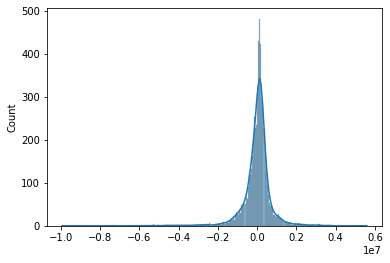

In [44]:
sns.histplot(residuals, kde=True);
#Looks good!
#The majority of predictions presented a low variation when compared to the actual values

## Conclusion

Using the **StatsModels** tool we were able to see the correlation and statistical significance between the surface (in square meters) of a house, its garage spaces and its final price.  